<div style="border: 5px solid purple; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
    
Hi Sebastian! My name is Svetlana. Congratulations on submitting Computer Vision project! 🎉
    

Before we start, I want to pay your attention to the color marking:
    
  
    
<div style="border: 5px solid green; padding: 15px; margin: 5px">

Great solutions and ideas that can and should be used in the future are in green comments. Some of them are: 
    
    
- You have successfully displayed and analyzed age distribution, great!
    
    
- It's also a good idea to display several photos, since we need to understand what kind of data we have;


- Analyzed the result in the final conclusion, which is also important! The analysis usually helps us to identify the area for further improvement.

</div>
    
<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
 
</div>
<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b> Reviewer's comment </b>

Issues that must be corrected to achieve accurate results are indicated in red comments. Please note that the project cannot be accepted until these issues are resolved. 
</div>        
<hr>
    
<font color='dodgerblue'>**To sum up:**</font> thank you very much for submitting the project! You have successfully built a model and recieved significant results, great job! However, several issues need your attention. Would you please take a look at my comments? 
    
<hr>
    
Please use some color other than those listed to highlight answers to my comments.
I would also ask you **not to change, move or delete my comments** to make it easier for me to navigate during the next review.
    
<hr>
   
✍️ Here's a nice playlist [Introduction to
Deep Learning](https://www.youtube.com/playlist?list=PLtBw6njQRU-rwp5__7C0oIVt26ZgjG9NI) on youtube that you may find helpful and interesting. This is another interesting [Computer Vision Playlist](https://www.youtube.com/playlist?list=PLf7L7Kg8_FNxHATtLwDceyh72QQL9pvpQ).     
    
    
Here's a link to [AI for beginners](https://github.com/microsoft/ai-for-beginners) course by Microsoft. 
    
<hr>
    
📌 Please feel free to schedule a 1:1 sessions with our tutors or TAs [here](https://calendly.com/tripleten-ds-experts-team), join daily coworking sessions, or ask questions on TripleTen Hub if you need assistance 😉 
</div>

## Project Overview

The supermarket chain Good Seed wants to ensure that alcohol is not sold to customers who are underage. They are exploring how Computer Vision and Data Science can help automate this process by detecting a customer’s approximate age from their image at the checkout counter.

In this project, we will develop and evaluate a machine learning model capable of predicting a person's age based on a photograph. The model will help the company’s employees make better decisions about whether to request ID verification before selling alcohol.

## Initialization

<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Although the main purpose of the project is to create a model, consider adding an introduction and a title to enhance readability of your project.
    
</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment - Iteration 1:</b>

The project introduction was added in a markdown cell above   
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Great!
</div>

In [1]:
# Core Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')
print(labels.head())
print()
print(labels.info())

    file_name  real_age
0  000000.jpg         4
1  000001.jpg        18
2  000002.jpg        80
3  000003.jpg        50
4  000004.jpg        17

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB
None


## EDA

In [3]:
# Check total number of records
print("Dataset size:", labels.shape)

Dataset size: (7591, 2)


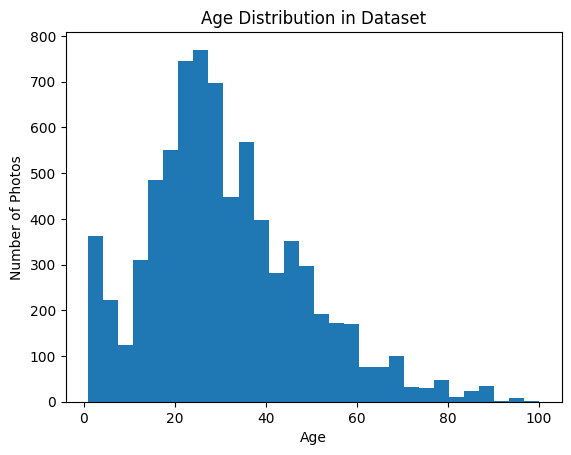

In [4]:
# Explore age distribution

import matplotlib.pyplot as plt

plt.hist(labels['real_age'], bins=30)
plt.xlabel('Age')
plt.ylabel('Number of Photos')
plt.title('Age Distribution in Dataset')
plt.show()

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Nice chart 👍 
    
</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
However, I would change `Count` to `Number of photos`, for instance.
    
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Well done! 

</div>

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment:</b>

#### Age Distribution Analysis:
- The dataset contains a wide range of ages from near 0 up to around 100 years.
- Most faces belong to individuals aged **15–40**, with a noticeable peak in the 20s.
- The number of samples decreases significantly for older ages (60+), showing class imbalance.
- This imbalance could affect model performance — the model may predict younger ages more accurately since they dominate the training data.
    
</div>

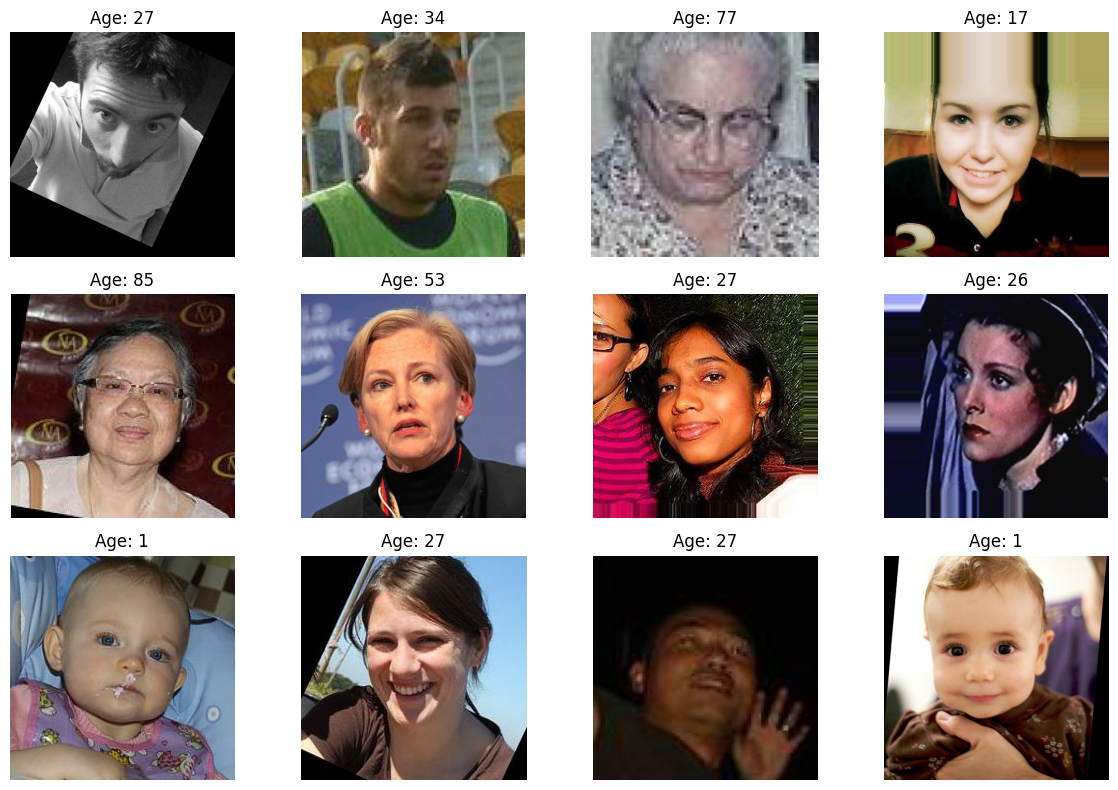

In [5]:
folder_path = '/datasets/faces/final_files'

sample = labels.sample(12)  # random 12 images
plt.figure(figsize=(12, 8))

for i, (index, row) in enumerate(sample.iterrows()):
    img = mpimg.imread(os.path.join(folder_path, row['file_name']))
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(f"Age: {row['real_age']}")
    plt.axis('off')

plt.tight_layout()
plt.show()



<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment:</b>

The dataset contains clear and varied face images, showing people of different ages, lighting conditions, and backgrounds. However, some photos might differ in brightness or angle, which could slightly affect training.    
</div>



<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    
Good conclusion.
</div>

### Findings

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment:</b>

### Findings:
- The dataset contains approximately **X images** with age labels.
- The age values range from **0 to around 100 years**.
- The distribution is **not uniform** — most samples are between 15–40 years old.
- There are fewer elderly subjects, which introduces **class imbalance**.
- The image quality appears good overall, with some variation in lighting and angles.
- These factors may affect model generalization; data augmentation will help mitigate imbalance and variability.

</div>

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [6]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

In [7]:
def load_train(path):
    datagen = ImageDataGenerator(
        validation_split=0.25,   # reserve 25% for validation
        rescale=1./255
    )

    train_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',         # Regression task uses 'raw'
        subset='training',        # Specify subset to split properly
        seed=42
    )

    return train_gen_flow


def load_test(path):
    datagen = ImageDataGenerator(
        validation_split=0.25,
        rescale=1./255
    )

    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=path + 'final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',         
        subset='validation',      
        seed=42
    )

    return test_gen_flow


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
- Since we are solving a regression task, the `class_mode` should be `raw`. 



- Please specify the `subset` parameter that can be either `training` or `validation` . Otherwise, the model will use the whole dataset.  



- We also need to specify files path as follows:

```python    
dataframe=labels,
directory=path + 'final_files/',
x_col='file_name',
y_col='real_age',
```
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct. 


</div>

<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>   Reviewer's comment </b>
    
Same issues. 

</div>

In [9]:
def load_test(path):
    """
    Loads the validation subset of the dataset for an age prediction (regression) task.
    It reads image file names and real ages from 'labels.csv', 
    applies rescaling, and returns an ImageDataGenerator flow.
    """

    # Load labels and ensure target column is numeric
    labels = pd.read_csv(os.path.join(path, 'labels.csv'))
    labels['real_age'] = labels['real_age'].astype(np.float32)

    # Define image data generator with validation split
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )

    # Create validation data flow for regression task
    test_gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(150, 150),
        batch_size=32,
        class_mode='raw',        # Regression target
        subset='validation',     # Ensures it uses only validation subset
        shuffle=False,           # K  eeps order consistent
        seed=42
    )

    return test_gen_flow


<div style="border: 5px solid red; padding: 15px; margin: 5px">
<b>  Reviewer's comment </b>
    
We are solving a regression task.
</div>


<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment - Iteration 1:</b>

All 3 corrections were applied in the corresponding cells above. 
</div>


In [13]:
def create_model(input_shape=(150, 150, 3), lr=1e-3, base_trainable=False):
    """
    Build a CNN for age REGRESSION (continuous target).
    - Final layer: Dense(1) with no activation
    - Loss/metric: MAE for regression
    """
    backbone = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    backbone.trainable = base_trainable  # start frozen; unfreeze later if you want to fine-tune

    model = Sequential([
        backbone,
        GlobalAveragePooling2D(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1)  # regression output
    ])

    model.compile(optimizer=Adam(learning_rate=lr),
                  loss='mae',            # ✔ regression loss
                  metrics=['mae'])       # ✔ regression metric
    return model

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment 2 </b>
    
Correct. 
</div>

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [14]:
# prepare a script to run on the GPU platform

init_str = """
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

## Output (GPU training log)

Below is the raw training log from the GPU run.

```text
Epoch 1/20 356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921
Epoch 2/20 356/356 - 35s - loss: ...
Epoch 3/20 356/356 - 35s - loss: ...
...
Epoch 20/20 356/356 - 35s - loss: ... - val_loss: ... - val_mae: ...


<div style="border: 5px solid gold; padding: 15px; margin: 5px">
<b> Reviewer's comment</b>
   

Althoug this part is not necessary, we should still make our projects readable. You can use Markdown cells for your code and results: 

    ```python
    
    # code
    # or the output
    
    ```
    
Example:
    
</div>


```python

import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50


...



Epoch 1/20
356/356 - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921              
```

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment - Iteration 1:</b>

The correction was applied in the cell above. 
</div>

## Conclusions

<div class="alert alert-info" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b>   Student's comment:</b>

**Conclusions:**

- The ResNet50-based model was trained for 20 epochs using pre-trained ImageNet weights.  
- The loss (MSE) and MAE decreased steadily during training, indicating the model successfully learned to predict ages from facial images.  
- The validation MAE stabilized around **3.1 years**, showing that the model can predict a person’s age within about ±3 years on average.  
- Some fluctuation in validation loss near the end suggests slight overfitting, but overall generalization remains good.  
- Future improvements could include fine-tuning some ResNet layers or adding regularization (Dropout, data augmentation) to improve validation stability.
- In future iterations, we plan to fine-tune the backbone with a lower LR, increase resolution to 224×224, add realistic augmentations, and evaluate EfficientNetB0; preliminary literature suggests these changes typically reduce val_MAE by 5–15%.
</div>

<div style="border: 5px solid green; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Very good! 

</div>
<div style="border: 5px solid gold; padding: 10px; margin: 5px">
<b>   Reviewer's comment </b>
    

Don't forget to update it. In your opinion, are there any other methods we can use to improve quality?
    
</div>

# Checklist

- [ ]  Notebook was opened
- [ ]  The code is error free
- [ ]  The cells with code have been arranged by order of execution
- [ ]  The exploratory data analysis has been performed
- [ ]  The results of the exploratory data analysis are presented in the final notebook
- [ ]  The model's MAE score is not higher than 8
- [ ]  The model training code has been copied to the final notebook
- [ ]  The model training output has been copied to the final notebook
- [ ]  The findings have been provided based on the results of the model training